In [ ]:
# pip install umap-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("test_data.csv")

/var/tmp/ipykernel_4858/3820739806.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("test_data.csv")


In [3]:
df.describe()

,enquiry_submit_count,agent_phone_count,add_to_cart_count,view_item_count,listing_engagement_count,engagement_weekdays,engagement_weekends
count,329937.000000,329937.000000,329937.000000,329937.000000,329937.000000,329937.000000,329937.000000
mean,0.102113,2.097128,0.558097,20.734446,348.078330,5.026205,2.149162
std,1.180079,15.432566,7.081821,63.189342,1155.536513,9.666862,2.830308
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,5.000000,83.000000,2.000000,1.000000
75%,0.000000,1.000000,0.000000,17.000000,256.000000,5.000000,2.000000
max,259.000000,6085.000000,953.000000,3545.000000,85473.000000,130.000000,51.000000


In [55]:
df

,user_pseudo_id,enquiry_submit_count,agent_phone_count,add_to_cart_count,view_item_count,listing_engagement_count,engagement_weekdays,engagement_weekends,days_active
0,1132762844.168378,259,14,0,0,0,2,1,3
1,1537784667.165657,195,192,0,830,806,42,16,58
2,1776011315.167606,181,0,0,2,0,1,1,2
3,1818135141.16284,162,134,0,1228,2292,71,33,104
4,1867856195.167321,127,6,1,152,76,21,2,23
...,...,...,...,...,...,...,...,...,...
329932,596225549.16847,0,0,0,29,360,1,1,2
329933,571903515.162617,0,1,0,29,432,3,3,6
329934,925742109.168207,0,1,0,29,876,7,2,9
329935,947966557.168868,0,1,0,29,319,2,2,4


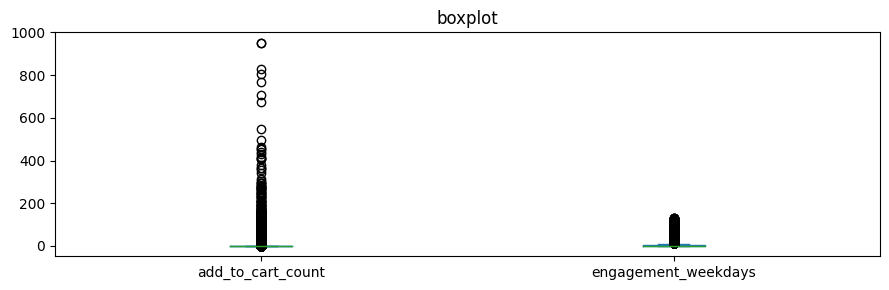

In [23]:
# Let's see if there are any outliers

# Set the figure size
plt.rcParams["figure.figsize"] = [9, 3]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = df[["add_to_cart_count", "engagement_weekdays"]].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

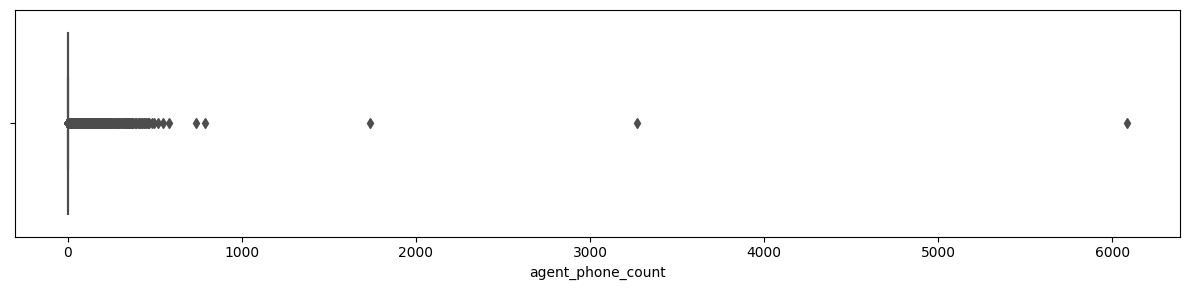

In [24]:
plt.rcParams["figure.figsize"] = [12, 3]
sns.boxplot(x=df["agent_phone_count"], palette="flare")
plt.show()

In [25]:
# let's see strange objects in data
df[df["view_item_count"] > 2500]

# 418 times of add_to_cart looks very strange. Let's see how many of this cart activity are top ones

,user_pseudo_id,enquiry_submit_count,agent_phone_count,add_to_cart_count,view_item_count,listing_engagement_count,engagement_weekdays,engagement_weekends
187,1359815062.165999,15,341,418,3545,26248,118,20
5790,718185510.165277,1,29,0,2744,51675,122,45
29614,225223025.167205,0,200,0,2881,57782,119,47
53687,2034189266.165408,0,283,0,2605,36410,120,45


In [26]:
df.sort_values(by="add_to_cart_count", ascending=False).head(3)
# we do have a lot of them actually. Let's see quartiles

,user_pseudo_id,enquiry_submit_count,agent_phone_count,add_to_cart_count,view_item_count,listing_engagement_count,engagement_weekdays,engagement_weekends
157,915538543.159464,16,69,953,711,3750,73,33
1567,1890411528.165296,4,39,953,139,1026,76,11
8388,1591721189.160775,1,11,831,132,9905,43,13


In [27]:
df.add_to_cart_count.describe()

# from here we see, that even 75% quantile is 0 adds to cart

count    329937.000000
mean          0.558097
std           7.081821
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         953.000000
Name: add_to_cart_count, dtype: float64

In [28]:
print(f'ratio of users, who added to cart at leat once: {df[df["add_to_cart_count"] > 0].shape[0] / df.shape[0] * 100} %')

ratio of users, who added to cart at leat once: 4.800310362281284 %


In [29]:
# Let's see the distribution for this 5%

df_carts = df[df["add_to_cart_count"] > 0]
df_carts.add_to_cart_count.describe()

count    15838.000000
mean        11.626279
std         30.267850
min          1.000000
25%          2.000000
50%          4.000000
75%         11.000000
max        953.000000
Name: add_to_cart_count, dtype: float64

In [30]:
# we can still see, that only 11 adds to cart are already 75% of cases of all cart adds.
# we need to research adds to cart. To do so we have to check only cases where somethig was added to the cart
# Let's use a technique called interquantile range (IQR) to calculate possible outliers

# IQR
Q1 = np.percentile(df_carts["add_to_cart_count"], 25, method='midpoint')
Q3 = np.percentile(df_carts["add_to_cart_count"], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

9.0


In [31]:
# 10% of cases is too much and we cannot consider it to be a real outliers without further investigation into it

# Above Upper bound, let's make it higher
upper=Q3+2.3*IQR
upper_array=np.array(df_carts["add_to_cart_count"]>=upper)
print("Upper Bound:",upper)
print(f'Cases, which are higher than upper bound: {upper_array.sum()}')
print(f'% of cases higher than upper bound: {upper_array.sum()/df_carts.shape[0] * 100}')

#Below Lower bound
lower=Q1-2.3*IQR
lower_array=np.array(df_carts["add_to_cart_count"]<=lower)
print("Lower Bound:",lower)
print(f'Cases, which are higher than upper bound: {lower_array.sum()}')

Upper Bound: 31.7
Cases, which are higher than upper bound: 1224
% of cases higher than upper bound: 7.728248516226796
Lower Bound: -18.7
Cases, which are higher than upper bound: 0


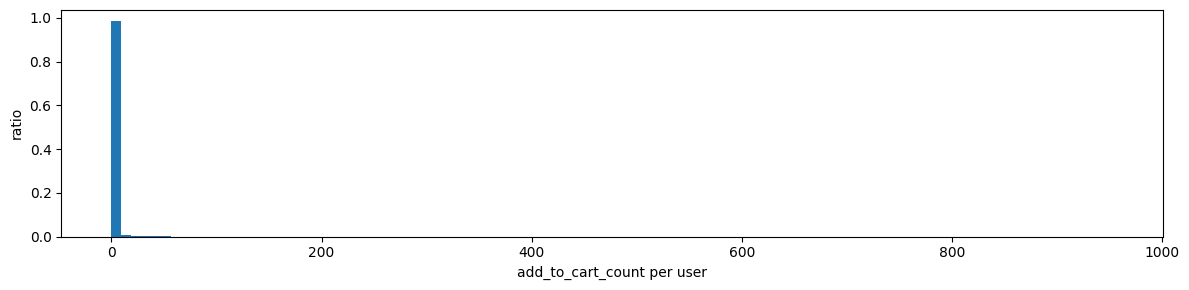

In [32]:
# here is the block to see data distributions
# let's start with the problematic cart data

# this is a simple histogram
plt.hist(df.add_to_cart_count, bins=100, weights=np.ones(df.add_to_cart_count.shape[0])/df.add_to_cart_count.shape[0])
plt.xlabel("add_to_cart_count per user")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.show()

# the tails is too long and a style is not so pretty, let's fix that and remove pusers with no cart activity from the plot

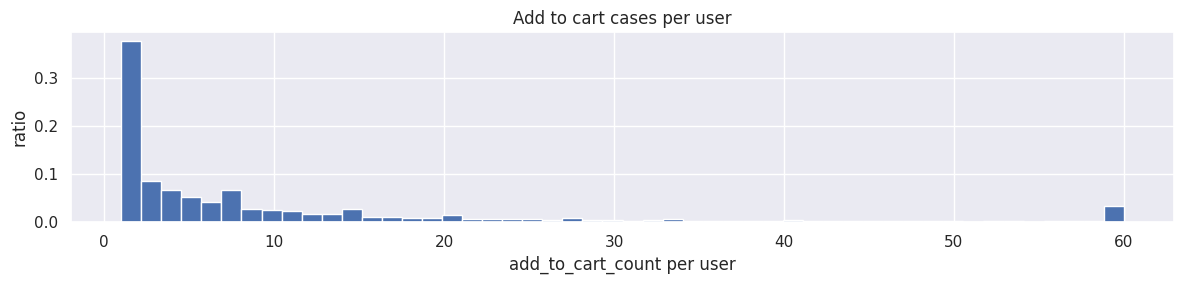

In [33]:
sns.set_theme(style="darkgrid")
upper_clip = 60
plt.hist(df_carts.add_to_cart_count.clip(upper=upper_clip), bins=50, weights=np.ones(df_carts.add_to_cart_count.shape[0])/df_carts.add_to_cart_count.shape[0])
plt.xlabel("add_to_cart_count per user")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Add to cart cases per user")
plt.show()

### The difference while using the `weights` parameter

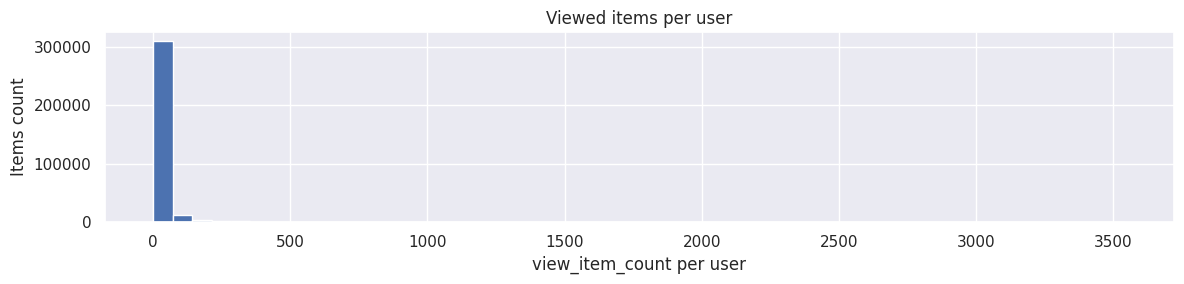

In [34]:
# here is the histogram without weights. Keep attention to the Y-axis
plt.hist(df.view_item_count, bins=50)
plt.xlabel("view_item_count per user")
plt.ylabel("Items count") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Viewed items per user")
plt.show()

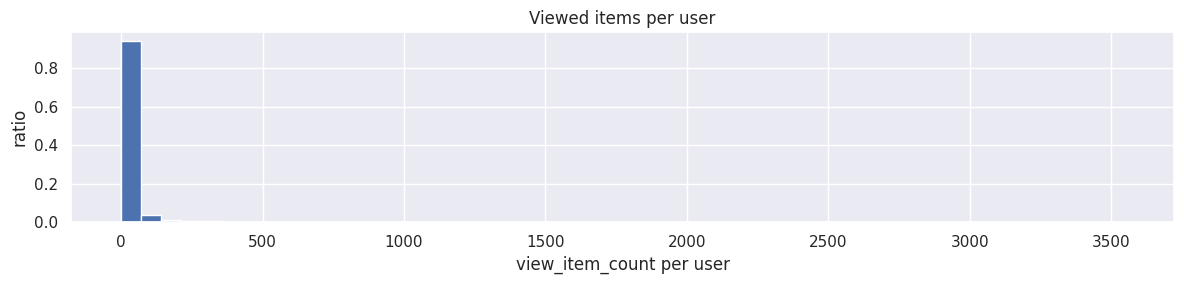

In [35]:
# Now we build the same data, but with weights -- each number will be counted against the overal number as its ratio
# if we make a SUM of the weights = it will be exacly 1. So by watching at the plot with weights we see, that number of items viewed close to zero are more than 0.8 of cases (or more than 80% of cases)
plt.hist(df.view_item_count, bins=50, weights=np.ones(df.view_item_count.shape[0])/df.view_item_count.shape[0])
plt.xlabel("view_item_count per user")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Viewed items per user")
plt.show()

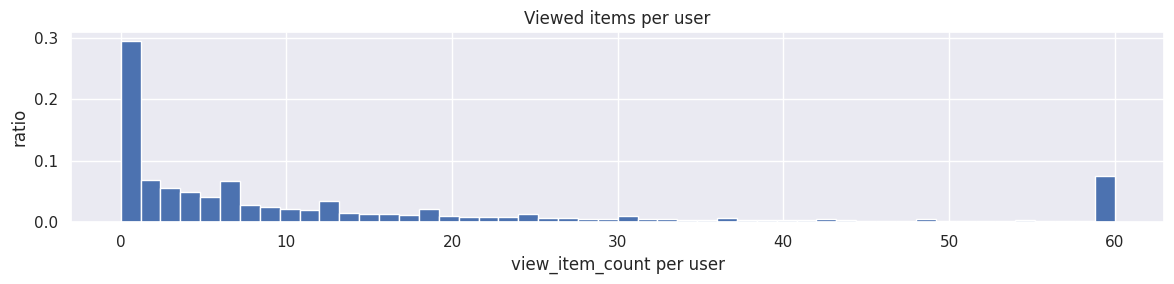

In [36]:
# Let's use clipper to take closer look into the numbers around zero
# weights let us see not the numbers, but % of cases with specific value
plt.hist(df.view_item_count.clip(upper=60), bins=50, weights=np.ones(df.view_item_count.shape[0])/df.view_item_count.shape[0])
plt.xlabel("view_item_count per user")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Viewed items per user")
plt.show()

<br>
<br>
<br>
<br>


### Data Preparation

To run K-means either manualy or in AutoMl we have to prepare the data first.
Some of the features will have correlation

In [4]:
df["days_active"] = df["engagement_weekdays"] + df["engagement_weekends"]
df_new = df.copy()
for col in df_new.drop(columns=["user_pseudo_id", "days_active"]).columns:
    df_new[col] = df_new[col]/df_new["days_active"]

df_new["weekend_ratio"] = df_new["engagement_weekends"]/df_new["engagement_weekdays"]
df_new.head(3)

,user_pseudo_id,enquiry_submit_count,agent_phone_count,add_to_cart_count,view_item_count,listing_engagement_count,engagement_weekdays,engagement_weekends,days_active,weekend_ratio
0,1132762844.168378,86.333333,4.666667,0.0,0.000000,0.000000,0.666667,0.333333,3,0.500000
1,1537784667.165657,3.362069,3.310345,0.0,14.310345,13.896552,0.724138,0.275862,58,0.380952
2,1776011315.167606,90.500000,0.000000,0.0,1.000000,0.000000,0.500000,0.500000,2,1.000000


In [5]:
df_variables = df_new.drop(columns=["user_pseudo_id", "engagement_weekdays", "engagement_weekends"])
# we remove user_pseudo_id because it is not the variable depending from anything

In [6]:
correlation_matrix = df_variables.corr()
correlation_matrix

,enquiry_submit_count,agent_phone_count,add_to_cart_count,view_item_count,listing_engagement_count,days_active,weekend_ratio
enquiry_submit_count,1.000000,0.002340,0.036768,0.031711,0.030251,0.004246,-0.005811
agent_phone_count,0.002340,1.000000,0.004891,0.034940,0.005539,0.002073,0.002632
add_to_cart_count,0.036768,0.004891,1.000000,0.125016,0.172714,0.038914,-0.017656
view_item_count,0.031711,0.034940,0.125016,1.000000,0.532669,0.069782,0.007287
listing_engagement_count,0.030251,0.005539,0.172714,0.532669,1.000000,0.092746,-0.025243
days_active,0.004246,0.002073,0.038914,0.069782,0.092746,1.000000,-0.276001
weekend_ratio,-0.005811,0.002632,-0.017656,0.007287,-0.025243,-0.276001,1.000000


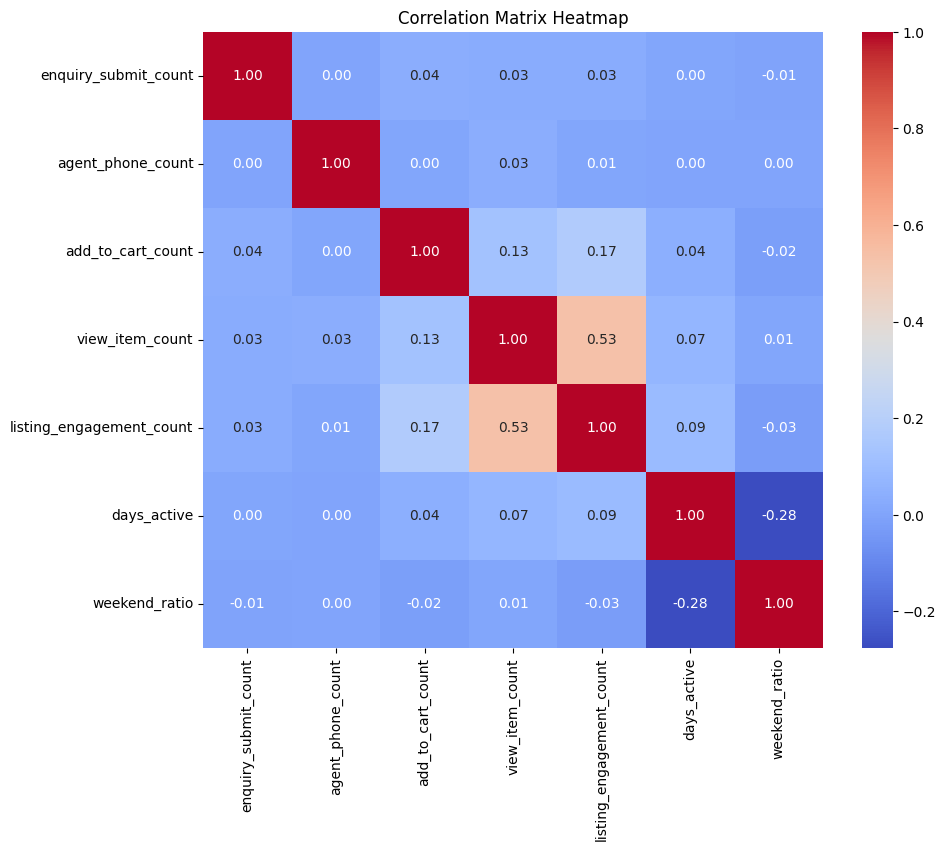

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


from the matrix we can see, that there are correlation between listing_engagement_count and engagement_weekdays, listing_engagement_count and engagement_weekends<br>
So we can prbably remove listing_engagement_count

### Splitting the data

Before we move on, we need to split the data into train and test.<br>
This is done to make sure that our model is working the same on the data it have never seen before.<br>

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_variables, test_size=0.2, random_state=42)

#### Let's save the data we have prepared

In [9]:
df_variables.to_parquet("temp_data/prepared_data_original.pq")

X_train.to_parquet("temp_data/prepared_train_data.pq")
X_test.to_parquet("temp_data/prepared_test_data.pq")

#### Normalization

Before we would run Kmeans, let's standartize every numerical variable<br>
In this case all of our variables are numerical, but not to forget that user_id must not be touched<br>

##### !Keep Attention!
We have to run Scaler on train data and only after on test/<br>
This is needed so that the model doesn't use any information about test dataset.

In [10]:
from sklearn.preprocessing import StandardScaler

if "scaler" in locals():
    del scaler
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
# Assuming your data is stored in a DataFrame called 'data'
X_num_normed = scaler.fit_transform(X_train)
X_test_normed = scaler.transform(X_test)
X_num_normed

array([[-0.12071909, -0.04626196, -0.10955335, ...,  3.88113885,
        -0.18124437, -0.95368798],
       [-0.12071909, -0.04626196, -0.10955335, ..., -0.2205515 ,
        -0.4316545 ,  0.35462406],
       [-0.12071909, -0.04626196, -0.10955335, ..., -0.56177574,
        -0.26471441, -0.80831997],
       ...,
       [-0.12071909, -0.04626196, -0.10955335, ..., -0.40428763,
        -0.4316545 ,  0.35462406],
       [-0.12071909, -0.04626196, -0.10955335, ..., -0.63177046,
        -0.4316545 ,  0.35462406],
       [-0.12071909, -0.04626196, -0.10955335, ..., -0.50927971,
        -0.4316545 ,  0.35462406]])

### Save data

I'm adding visualisation step here, but it is better to run it in the model section,<br>
so there is no need to run UMAP twice.

In [11]:
data_to_save = pd.DataFrame(X_num_normed, columns=df_variables.columns)
data_to_save.to_parquet("temp_data/prepared_data_normed.pq")

test_to_save = pd.DataFrame(X_test_normed, columns=df_variables.columns)
test_to_save.to_parquet("temp_data/test_data_normed.pq")

### Visualization

Let's visualize the data before K-means run.<br>
By using plot we will be able to see if we did a good job in data preparation

#### IMPORTANT
I have removed seeding for UMAP (random_state parameter) for it to run faster.

##### why I did that
This is not the main model, but a helpr to visualize and check the data.

In [13]:
# Set a seed for reproducibility (optional)
np.random.seed(42)

# Perform random sampling
sample_size = round(data_to_save.shape[0]*0.3)
random_sample = data_to_save.sample(n=sample_size)

random_sample

,enquiry_submit_count,agent_phone_count,add_to_cart_count,view_item_count,listing_engagement_count,days_active,weekend_ratio
158284,-0.120719,-0.022304,-0.109553,-0.476289,-0.648019,-0.014304,-0.692026
4039,-0.120719,-0.046262,-0.109553,-0.727198,0.555223,-0.348184,2.099040
45861,-0.120719,-0.046262,-0.109553,-0.580834,-0.045565,-0.431655,0.354624
92763,-0.120719,-0.046262,-0.109553,0.794988,-0.126059,-0.181244,-0.953688
256265,-0.120719,-0.046262,-0.109553,-0.727198,-0.652186,-0.348184,-0.517584
...,...,...,...,...,...,...,...
125785,-0.120719,-0.046262,-0.109553,-0.727198,-0.631770,-0.431655,0.354624
18631,-0.120719,-0.046262,-0.109553,1.175535,2.124271,-0.264714,-0.808320
156183,-0.120719,-0.046262,-0.109553,0.150986,0.660215,-0.348184,2.099040
73747,2.320886,-0.026137,3.409616,0.982335,1.735101,1.488157,-0.953688


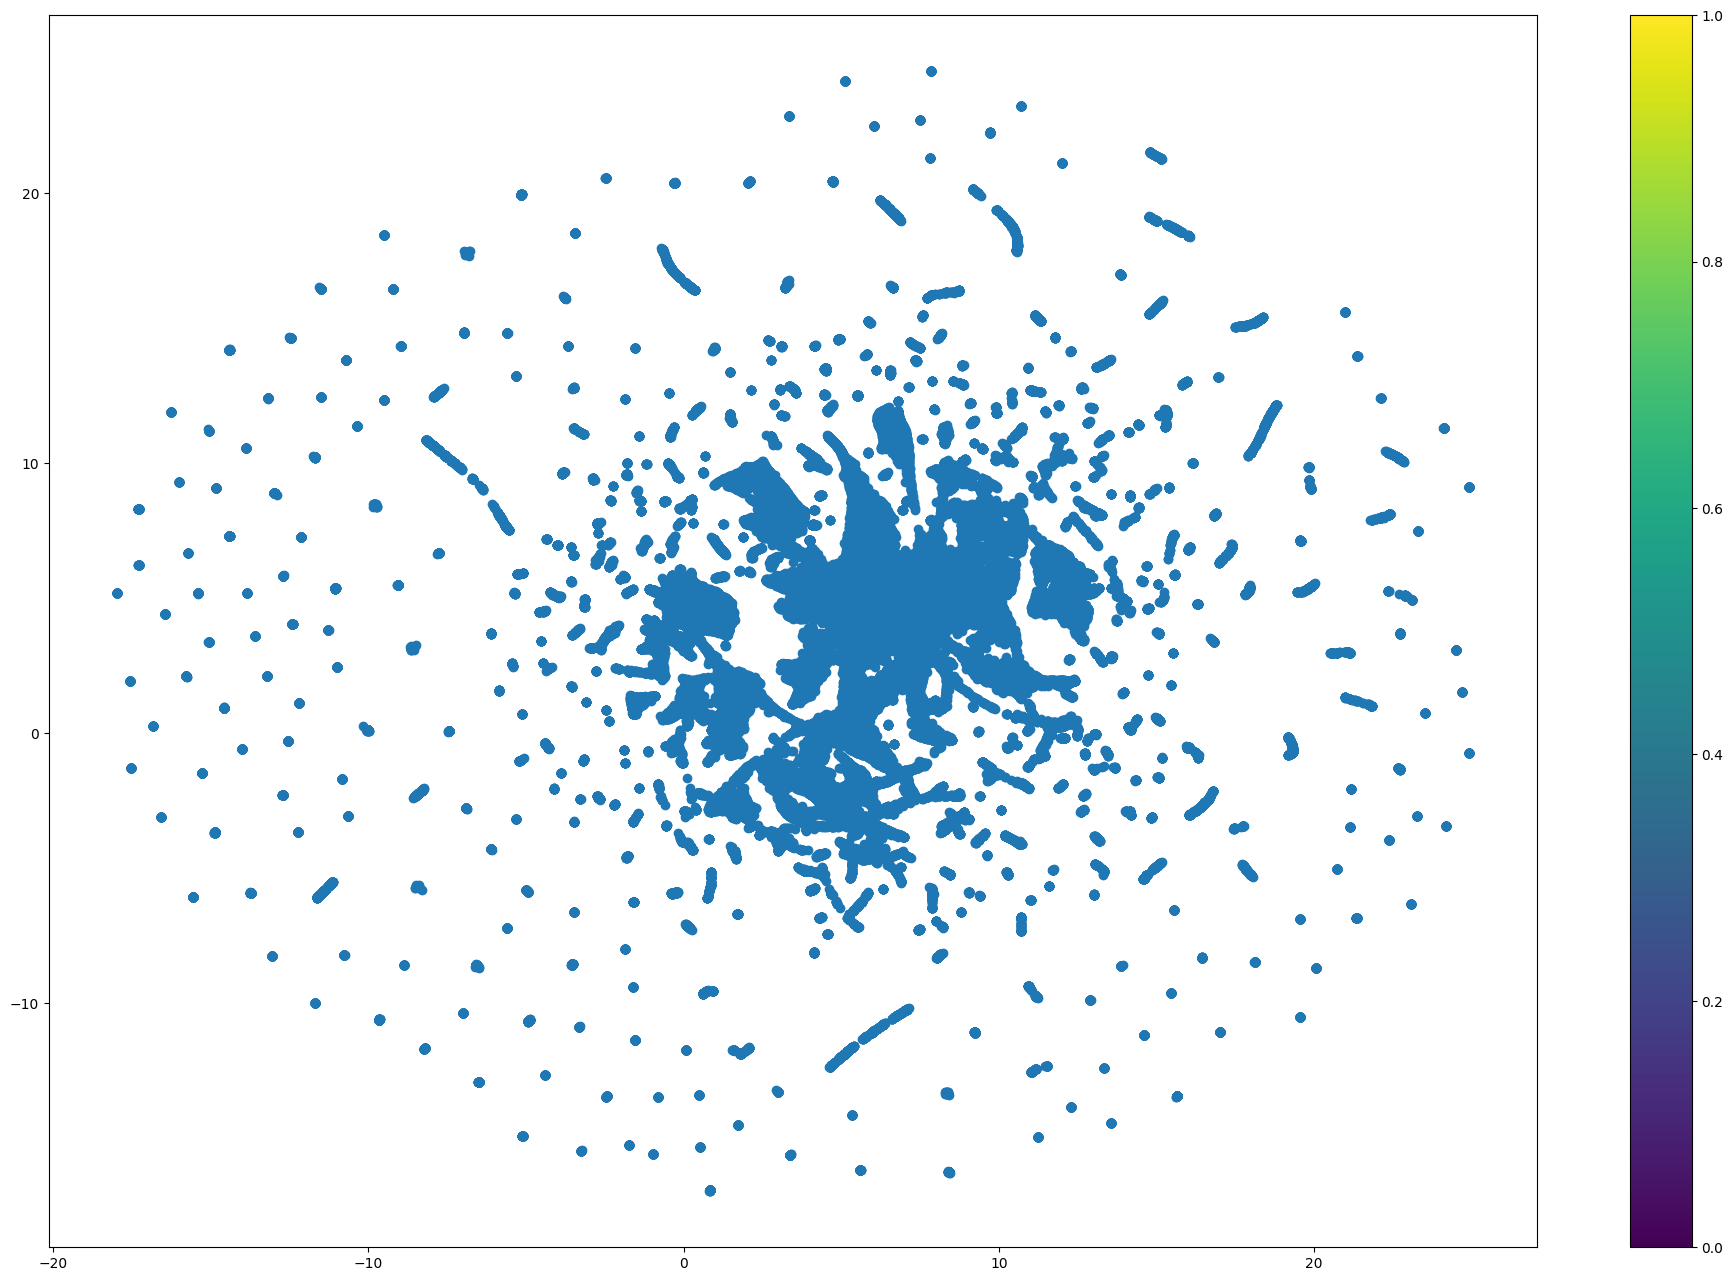

In [14]:
# to do so, we need to use UMAP
# It will give you a map to analyse
import umap.umap_ as umap

if "umap_model" in locals():
    del umap_model

# defining the UMAP model
umap_model = umap.UMAP(n_components=2, metric='euclidean', n_neighbors=30, min_dist=0.05, n_epochs=100, n_jobs=8)

# fitting
embedding = umap_model.fit_transform(random_sample)

plt.figure(figsize=(24,16))
plt.scatter(embedding[:, 0], embedding[:, 1])
# plt.title(f"Amount of clusters is {n_clusters}, batch size is {batch_size}")
plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(24,16))
plt.scatter(embedding[:, 0], embedding[:, 1])
# plt.title(f"Amount of clusters is {n_clusters}, batch size is {batch_size}")
plt.colorbar()
plt.show()